# Fourier transform

## fourier_transform

Det grundläggande kommandot har formen `fourier_transform(funktion, x, k)` i sympy. 


Här är 'funktion' den funktion som ska integreras. x står för integrationsvariabeln. k är den variabel som det inte integreras över; transformen blir en funktion av denna variabel.


$$
F\left(k\right)=\intop_{-\infty}^{\infty}\,f(x)e^{-2\pi ixk}\,\textrm{dx}
$$

In [1]:
from sympy import fourier_transform, exp, Heaviside
from sympy.abc import x, k

print(fourier_transform(exp(-x**2), x, k))
print(fourier_transform(Heaviside(x)*exp(-x), x, k))


sqrt(pi)*exp(-pi**2*k**2)
1/(2*I*pi*k + 1)


Den andra att jämföra med från tabell att fouriertransformen av $\theta(x)e^{-x}$
är $\frac{1}{i\omega+1}$.
$\omega$ är $2\pi f$. Vi har f som k. Den imaginära enheten betecknas med versal I.


Användningen är dock ganska begränsad eftersom det bara finns svar om vi har integrerbara funktioner, dvs. att svaret kan uttryckas analytiskt. 

I praktiska fall har man dessutom mätdata och inte en kontinuerlig funktion. Vi behöver en fouriertransform som är *diskret* och kan ta enskilda värden som indatat. Vi studerar nedan den diskreta fouriertransformen.

## Diskret FT

*Diskret* Fourier transform definieras som

$$
X_{k}=\sum_{n=0}^{N-1}x_{n}\cdot e^{-2\pi ikn/N}
$$


jämför

$$
F\left(k\right)=\intop_{-\infty}^{\infty}\,f(x)e^{-2\pi ikx}\,\textrm{dx}
$$

Där $x_{n}$ är data, $N$ stycken, given som en array. $x$ motsvaras av $n/N$. Det görs en summation över alla tal i arrayn för varje k; en ny talföljd genereras. Beräkningarna kan vara ganska betungande och man utnyttjar symmetrier i talföljderna för att snabbt kunna räkna ut värden, detta kallas för Fast Fourier Transform: fft.
Inversen betecknas ifft.

Discrete Fouriertransform, DFT, är själva transformen och Fast Fouriertransform, FFT, är en algoritm för att beräkna DFT. 

FFT finns både i numpy och scipy men denna del i numpy uppgraderas inte längre utan finns där mest för bakåtkompatibilitet. Man är tämligen överens om att den ska ligga i scipy.

Utöver fft finns det rfft som endast ger reella svar. dct() och dst() står för diskret cosinus respektive sinus transformer.

Vi byter således till scientific python för att beräknar transformen (dft, fft). Använder numpy för tex. linspace, sin samt matplotlib.pyplot för plottning.

Vi börjar med en kort array.



In [2]:
from scipy.fft import fft, ifft
import numpy as np

# Datamängd i array
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
print("Data", x)

# Beräkna fouriertransformen
y = fft(x)
print("\nTransformen", y)

# Beräkna inversen, vi borde få tillbaka vår array [1.0, 2.0, 1.0, -1.0, 1.5]!
yinv = ifft(y)
print("\nInverstransformen", yinv)
print("\nRealdelen av inverstransformen", yinv.real)

print("\nX_2 =",y[2])  # Se text längre ner om varför denna skrivs ut

Data [ 1.   2.   1.  -1.   1.5]

Transformen [ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]

Inverstransformen [ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]

Realdelen av inverstransformen [ 1.   2.   1.  -1.   1.5]

X_2 = (-1.831559480312316+1.6082204064440706j)


Vi fick tillbaka arrayn som vi matade in.

Som exempel beräknar vi för hand. Vi utgår från definitionen

$$
X_{k}=\sum_{n=0}^{N-1}x_{n}\cdot e^{-2\pi ikn/N}
$$
och väljer $k=2$ som vi skrev ut som X_2.

$$
X_2=\sum_{n=0}^{4}x_{n}\cdot e^{-2\pi i\cdot2n/5}.
$$

$$
X_2=1 e^{0}+2e^{-i4\pi/5}+1e^{-i8\pi/5}-1e^{-i12\pi/5}+1,5e^{-i16\pi/5}=\\
1(\cos(0)-i\sin(0))+2(\cos(4\pi/5)-i\sin(4\pi/5))+1(\cos(8\pi/5)-i\sin(8\pi/5))-1(\cos(12\pi/5)-i\sin(12\pi/5))\\+1,5(\cos(16\pi/5)-i\sin(16\pi/5))
$$
som avrundat för realdelen är
$$
1-2\cdot 0,809+0,309-0,309-1,5 \cdot 0,809 = -1,8315
$$
och för imaginärdelen
$$
0-2\cdot 0,588+0,951+0,951+1,5\cdot 0,588 = 1,608
$$

vilket stämmer med kodens utdata $X_2 = -1.8316+1.608j$.

Symmetrier framgår också, detta används för att minska beräkningsarbetet.

Vi tittar nu på ett större exempel.

Först genererar vi data, sedan låter vi fft ta fram transform-grafen som funktion av frekvensen. Studerar en sinusfunktion och en gauss-kurva. Sinusfunktionen har en delta-funktion som FT och gauss har en gauss som FT. Nu är det en speciell algoritm och en diskret funktion (en samplad funktion) men det stämmer bra med teorin för kontinuerliga funktioner.

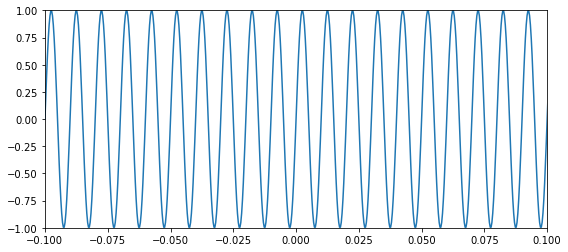

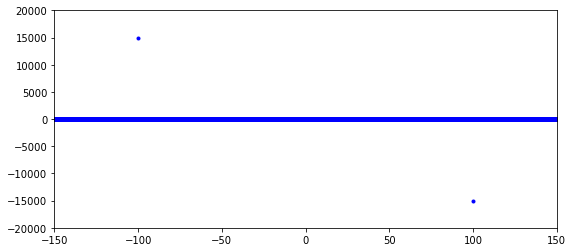

In [18]:
from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt
import numpy as np

# Antal samplingspunkter, sample rate: datapunkter per sekund
n = 3000
# Signalens varaktighet är från -d till d i sekunder
d = 5

# Olika funktioner att studera
# Genererar en sinusvåg med given frekvens
def gen_wave1(frekv):
    x = np.linspace(-d,d,n*(2*d), endpoint=False)
    y = np.sin(2*np.pi*frekv*x)
    return(x,y)

# Genererar en gauss-kurva med en given varians
def gen_wave2(A):
    x = np.linspace(-d,d,n*(2*d), endpoint=False)
    y = 1/np.sqrt(4*np.pi*A)*np.exp(-x**2/4/A)
    return(x,y)


# Genererar en sinusvåg genom anrop
# Frekvensen är satt till 100 Hz
x,y = gen_wave1(100)

# Genererar en gaussisk funktion genom anrop
# Variansen A är satt till 0,0001
#x,y=gen_wave2(0.0001)

# Ritar funktionen som ska transformeras
plt.figure(figsize=(9, 4))  # x respektive y i tum.
plt.axis([-0.1,0.1,-1,1])
plt.plot(x,y)
plt.show()


# Kommandot för att få ut fouriertransformen för en av funktionerna
yf = fftshift(fft(y)) # Själva transformen fft, och omsortering fftshift
xf = fftshift(fftfreq(n*(2*d),1/n)) # Skapar en vettig frekvensskala


plt.figure(figsize=(9, 4))  # x respektive y i tum.

# Vi plottar imaginärdelen av transformen (när det är sinus)
# För gaussfunktionen ska man använda np.abs(yf)
# Ofta vill man inte se hela och i y-led behöver man inte se spikens max, därför .axis
plt.axis([-150,150,-20000,20000])  
plt.scatter(xf,yf.imag, color="blue", marker=".")
plt.show()



Kommandot är scipy.fft.fft(). Som argument skickar vi en array med datapunkter; i vårt fall samplade punkter från en kontinuerlig funktion eller mätdata. Fler argument finns men vi behandlar dem inte här. Observera att grafen är diskret även om värdena ligger tätt på den horisontella axeln.

fftfreq(points,timestep) ska ha antalet samplingspunkter vilket i vårt fall är $n\cdot(2d)$ eftersom $d$ bara anger halva intervallet och $n$ är antalet punkter per sekund. timestep är sedan tiden mellan varje samplingspunkt. Tiden är $2d$, antalet punkter är $n\cdot(2d)$ så kvoten är $1/n$.



Kommandot fft skapar en array. Data i arrayn är dock inte lagrad för utskrift genom plot. Enkelt uttryckt kommer först de positiva frekvenserna från 0 och uppåt, sedan de negativa. Man kan säga att de lagras enligt mallen (för 8 frekvenser) [0, 1, 2, 3, -4, -3, -2, -1]. Detta fungerar inte helt snyggt vid plottning. Därför finns kommandot fftshift() som lägger värdena i ordning  [-4, -3, -2, -1, 0, 1, 2, 3] så de kan plottas. Anledningen till den valda ordningen är bl.a. Nyqvists teorem.

Utdata är inte normerad. Den vanliga normeringen är att dividera med antalet datapunkter som är $n\cdot(2d)$. I exemplet ovan är det $3000\cdot 2 \cdot 5=30000$. I grafen har vi punkterna med y-värde som tex. 15000 vilket då normerat är 0,5.

Vid beräkningar av FT bör man beakta vad som ska plottas. Ska man plotta realdel, imaginärdel ($x+iy$) eller kanske absolutbelopp och fas ($re^{i\phi}$)? Teorin ger ofta stöd här.

Vi plottar mätdata från en fil. Filen heter Sampletime_contmode.csv Vi använder csv.reader(f, delimiter=';') då filen separerar data med semikolon.


9947


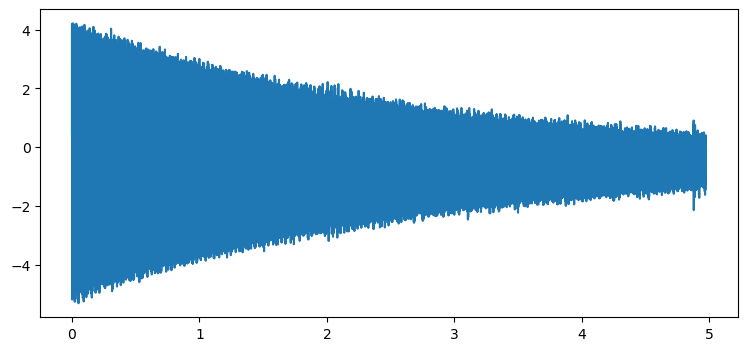

9947 9947


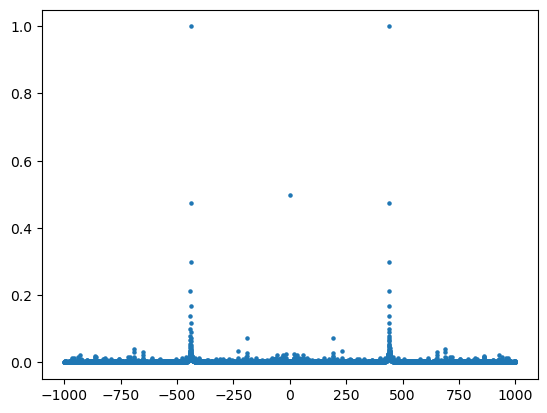

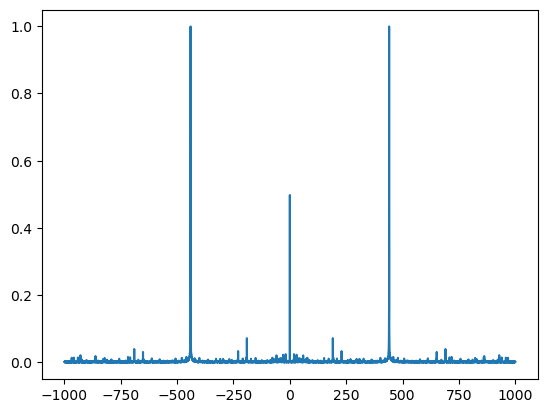

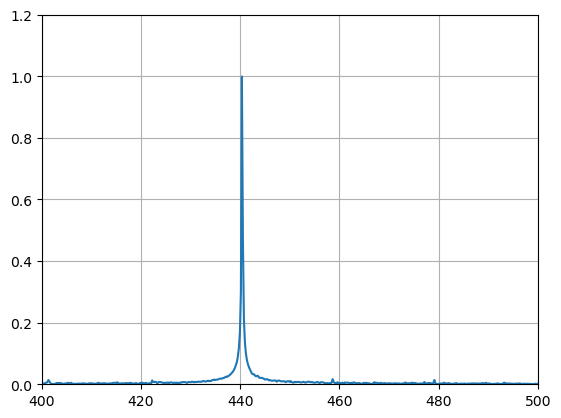

In [7]:
# Vi behöver importera en modul för att läsa .csv. En fil exporterad som 'text csv'
# från LibreOffice läses.

from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt
import numpy as np
import csv

x=[]; y=[]  # Två tomma listor att starta med

with open('Sampletime_contmode.csv','r') as f:
  data = csv.reader(f, delimiter=';')
  next(data)  # Första raden är rubrik, hoppar över den
  for row in data:
        x.append(float(row[0]))  # Omvandlar strängarna till float och lägger i en annan lista
        y.append(float(row[1]))

# fft ska ha arrayer
x=np.array(x)
y=np.array(y)

xnr=len(x)  # Antal element
step=x[1]-x[0]  # Tidssteg
print(xnr)

# Den uppmätta funktionen
plt.figure(figsize=(9, 4))  # x respektive y i tum.
plt.plot(x, y)
plt.savefig('sampleplot.png')
plt.show()


# FT visad med scatterplot
yf = fftshift(fft(y))/xnr # Själva transformen
xf = fftshift(fftfreq(xnr,step)) # Skapar en vettig frekvensskala
plt.scatter(xf,np.abs(yf), s=5)  # s står för size, storleken hos markören
plt.savefig('samplefreq.png')
plt.show()

# FT visad så det dras en linje mellan punkterna
yf = fftshift(fft(y))/xnr # Själva transformen
xf = fftshift(fftfreq(xnr,step)) # Skapar en vettig frekvensskala
plt.plot(xf,np.abs(yf))
plt.savefig('samplefreq.png')
plt.show()

# För att förstora upp intressant område
plt.grid()
#plt.axis([400,500,0,2000])
plt.axis([400,500,0,1.2])
plt.plot(xf,np.abs(yf))


Signalen vi analyserat varade i 5 s och svängde med en frekvens på 440 Hz. Samplingsfrekvensen var 2 kHz, vilket ger ett bra resultat.


Vi gör det för en mycket kortare sampling men med samma samplingsfrekvens, f=2 kHz, T=0,0005. Signalen varar nu endast 0,01 s.

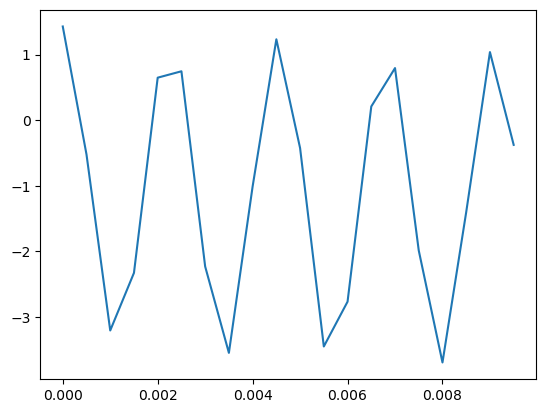

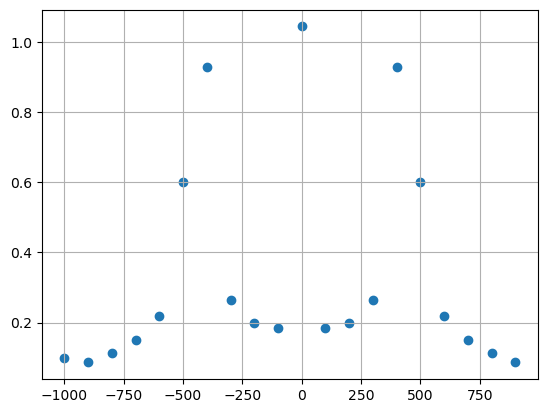

In [8]:
# Vi behöver importera en modul för att läsa .csv. En fil exporterad som 'text csv'
# från LibreOffice läses.

from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt
import numpy as np
import csv

x=[]; y=[]  # Två tomma listor att starta med

with open('Samplefreq1.csv','r') as f:
  data = csv.reader(f, delimiter=';')
  next(data)  # Första raden är rubrik
  for row in data:
        x.append(float(row[0]))  # Omvandlar strängarna till float och lägger i en annan lista
        y.append(float(row[1]))

# fft ska ha arrayer
x=np.array(x)
y=np.array(y)

xnr=len(x)  # Antal element
step=x[1]-x[0]  # Tidssteg

# Den uppmätta funktionen
plt.plot(x, y)
plt.savefig('sampleplot2.png')
plt.show()


# FT
yf = fftshift(fft(y))/xnr # Själva transformen
xf = fftshift(fftfreq(xnr,step)) # Skapar en vettig frekvensskala
plt.grid()
plt.scatter(xf,np.abs(yf))
plt.savefig('samplefreq2.png')
plt.show()


Syns fortfarande någon form av topp något under 500. Vi har också en topp vid 0.

## Realdel och imaginärdel

FT av $f(t)=\theta(t)e^{-t}$ är
$$
\frac{1}{1+i\omega}=\frac{1-i\omega}{\left(1+i\omega\right)\left(1-i\omega\right)}=\frac{1}{1+\omega^{2}}-i\frac{\omega}{1+\omega^{2}}.
$$


Så om vi genomför motsvarande för DFT bör vi få liknande realdel och imaginärdel.

Absolutbeloppet är 
$$
\frac{1}{1+\omega^{2}}
$$

och fasen är

$$
\arctan(-\omega)
$$.

Dessa överensstämmer med de numeriska resultaten, som dock är diskreta. Observera att vi inte behandlar normeringen av funktionerna.


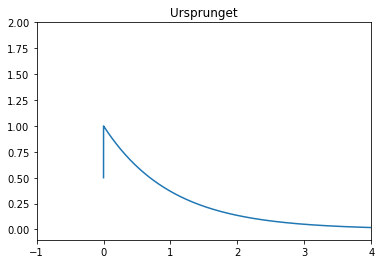

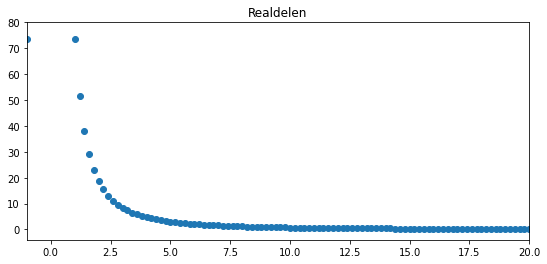

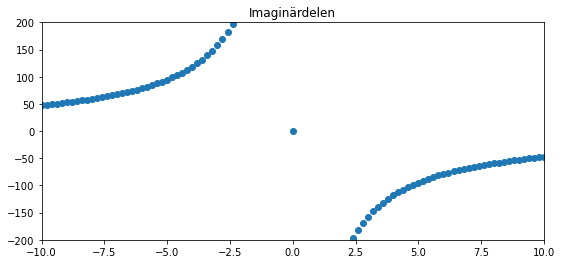

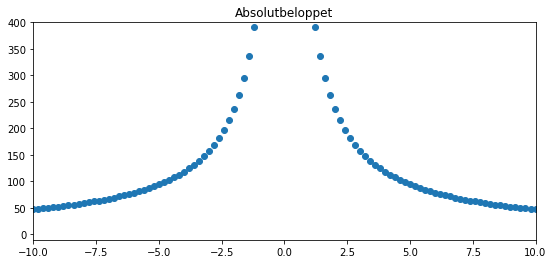

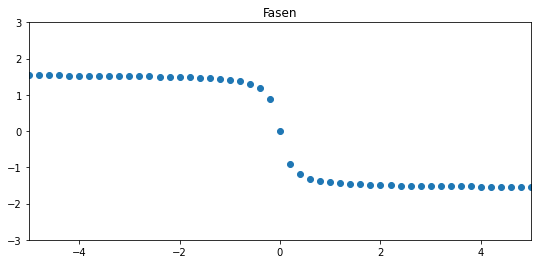

In [31]:
from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt
import numpy as np

# Antal samplingspunkter, sample rate: datapunkter per sekund
n = 3000
# Signalens varaktighet är från 0 till d
d = 5

# Obs man måste vara noga med att ta bort den negativa delen där funktionen är 0. 
# Vi ska återskapa exponentialfunktionen
# och inte tvinga återskapandet av Heaviside delen.

def wave():
    x = np.linspace(0,d,n*(1*d), endpoint=False)
    y = np.heaviside(x,0.5)*np.exp(-x)
    return(x,y)

x,y = wave()

# Ritar funktionen som ska transformeras
plt.title("Ursprunget")
plt.axis([-1,4,-0.1,2])
plt.plot(x,y)
plt.show()


# Kommandot för att få ut fouriertransformen för en av funktionerna
yf = fftshift(fft(y)) # Själva transformen
xf = fftshift(fftfreq(n*(1*d),1/n)) # Skapar en vettig frekvensskala, behöver i regel justeras


plt.figure(figsize=(9, 4))
plt.title("Realdelen")
# Realdelen
plt.axis([-1,20,-4,80])  
plt.scatter(xf,yf.real)
plt.show()

# Imaginärdelen
plt.figure(figsize=(9, 4)) 
plt.title("Imaginärdelen")
plt.axis([-10,10,-200,200])  
plt.scatter(xf,yf.imag)
plt.show()

# Absolutbeloppet
plt.figure(figsize=(9, 4))  
plt.title("Absolutbeloppet")
plt.axis([-10,10,-10,400])  
plt.scatter(xf,abs(yf))
plt.show()
         
# Fasen
plt.figure(figsize=(9, 4))  
plt.title("Fasen")
plt.axis([-5,5,-3,3])  
plt.scatter(xf,np.angle(yf))
plt.show()

## Uppgifter

Om du söker på nätet efter information så observera att scipy.fftpack inte ska användas längre utan det är scipy.fft.


**Uppgift 1**

Skriv om programmet så vi erhåller subplots, en för funktionen och en för dess fouriertransform.
Undersök förhållandet mellan värdet på A (i Gauss-funktionen) och bredden på funktionen respektive fouriertransformen. Mät tex. bredden vid halva höjden. Vad händer med transformens bredd när bredden ökar/minskar hos funktionen?
Plotta subplots i ett rutnät med 2 gånger 2; du får då 4 grafer. Plotta i första kolonnen resultaten för ett litet A, överst funktionen (2,2,1) och nederst transformen (2,2,3). I andra kolonnen väljer du ett större A; funktionen i (2,2,2) och transformen i (2,2,4).
Detta kopplar till Heisenbergs obestämbarhets-relation för rörelsemängd och läge.


[Lösningsexempel](./uppg/fourier2Uppg1.ipynb)


**Uppgift 2**

Beräkna FT för lådfunktionen och plotta resultatet. Lådfunktionen är 1 mellan -1 och 1 och 0 i övrigt. 


[Lösningsexempel](./uppg/fourier2Uppg2.ipynb)
